# 1. Association Rule Generation

Parts a, b, and c

In [1]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

DATASET_FILE = 'Grocery_Items_53.csv'

df_csv= pd.read_csv(DATASET_FILE)
dataset = []

# drop NaN values
for _, x in df_csv.iterrows():
    dataset.append(list(x.dropna()))


def get_association_rules(dataset, min_support, min_confidence_threshold):
    # source: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
    te = TransactionEncoder()
    te_ary = te.fit_transform(dataset)
    df =  pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, 
                            min_threshold=min_confidence_threshold, 
                            metric="confidence")
    return rules

get_association_rules(dataset, 0.01, 0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.109750,0.158125,0.012875,0.117312,0.741895,-0.004479,0.953763,-0.280984
1,(yogurt),(whole milk),0.083750,0.158125,0.011875,0.141791,0.896702,-0.001368,0.980967,-0.111685
2,(soda),(other vegetables),0.094500,0.123125,0.010000,0.105820,0.859453,-0.001635,0.980647,-0.152971
3,(soda),(whole milk),0.094500,0.158125,0.010125,0.107143,0.677583,-0.004818,0.942900,-0.344474
4,(whole milk),(other vegetables),0.158125,0.123125,0.016875,0.106719,0.866756,-0.002594,0.981634,-0.154406
5,(other vegetables),(whole milk),0.123125,0.158125,0.016875,0.137056,0.866756,-0.002594,0.975585,-0.149162


1) Part D

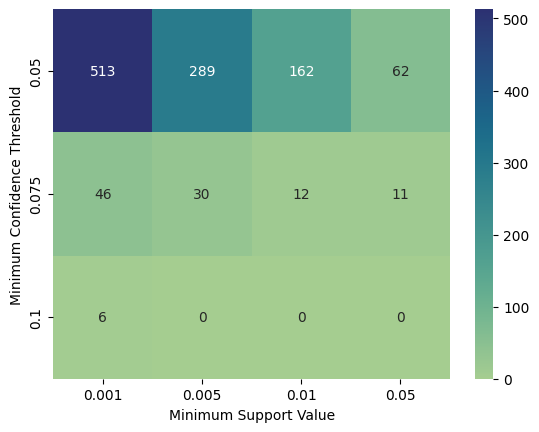

In [2]:
from itertools import product

from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt

msvs = [0.001, 0.005, 0.01, 0.05]
mcts = [0.05, 0.075, 0.1]

# cartesion product msvs X mcts
msvs_cross_mcts = product(msvs, mcts)

# Create empty array of shape(y_vals, x_vals)
heatmap_data = np.zeros((len(mcts), len(msvs)))

# fill heatmap_data array
for index, (msv, mct) in enumerate(msvs_cross_mcts):
    n_association_rules = len(get_association_rules(dataset, msv, mct))
    heatmap_data.flat[index] = n_association_rules

# display heatmap
heatmap = heatmap(heatmap_data, 
                  xticklabels=msvs, 
                  yticklabels=mcts,
                  annot=True, 
                  fmt='g', 
                  cmap='crest')
plt.xlabel('Minimum Support Value')
plt.ylabel('Minimum Confidence Threshold')
plt.show()



1) Part e

In [3]:
a_rules = get_association_rules(dataset, min_support=0.005, min_confidence_threshold=0)
max_confidence = a_rules['confidence'].max()
max_confidence_rules = a_rules.query(f'confidence == {max_confidence}')
for _, max_confidence_rule in max_confidence_rules.iterrows():
    print("Rule: {} -> {}".format(max_confidence_rule.antecedents, max_confidence_rule.consequents))
    print("The confidence is ", max_confidence_rule.confidence)

Rule: frozenset({'bottled beer'}) -> frozenset({'whole milk'})
The confidence is  0.16111111111111112


# 2 Image Classification using CNN


Found 826 files belonging to 4 classes.
Using 661 files for training.
Using 165 files for validation.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 19208)             0         
                                                                 
 dense (Dense)               (None, 16)                307344    
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 307636 (1.17 MB)
Trainable params: 307636 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

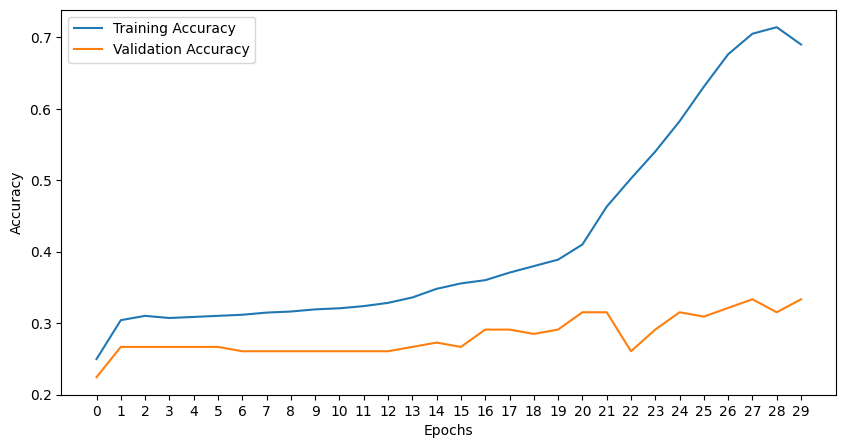

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers

LEARNING_RATE = 0.01
N_EPOCHS = 30
BATCH_SIZE = 32
IMAGE_SIZE = [100,100]

## Load Dataset ##
normalize = lambda image, label : (tf.cast(image, tf.float32) / 255.0, label)

IMAGES_DIR = './Cropped'
train_dataset, val_dataset = tf.keras.utils.image_dataset_from_directory(
    IMAGES_DIR,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,  # Adjust image size as needed
    subset='both',
    validation_split=0.2,
    seed=42
)
train_dataset.map(normalize)
val_dataset.map(normalize)

## Create model ##
INPUT_SHAPE = IMAGE_SIZE + [3]

model = models.Sequential()
model.add(
    layers.Conv2D(8, (3,3), activation='relu', input_shape=INPUT_SHAPE)
)
model.add(
    layers.MaxPooling2D((2, 2))
)
model.add(
    layers.Flatten()
)
model.add(
    layers.Dense(16, activation='relu')
)
model.add(
    layers.Dense(4, activation='softmax')
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

# Train model
history = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset, batch_size=BATCH_SIZE)

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(N_EPOCHS))
plt.show()

# 2) Part 2
Banner ID 916322804

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 4)         112       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 4)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 9604)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                153680    
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 153860 (601.02 KB)
Trainable params: 153860 (601.02 KB)
Non-trainable params: 0 (0.00 Byte)
______________

21/21 [==============================] - 1s 19ms/step - loss: 348.6417 - accuracy: 0.2784 - val_loss: 1.4206 - val_accuracy: 0.3091
Epoch 2/30
21/21 [==============================] - 0s 13ms/step - loss: 1.3617 - accuracy: 0.3343 - val_loss: 1.3916 - val_accuracy: 0.2909
Epoch 3/30
21/21 [==============================] - 0s 14ms/step - loss: 1.3426 - accuracy: 0.3374 - val_loss: 1.3931 - val_accuracy: 0.2788
Epoch 4/30
21/21 [==============================] - 0s 14ms/step - loss: 1.3296 - accuracy: 0.3419 - val_loss: 1.3925 - val_accuracy: 0.2848
Epoch 5/30
21/21 [==============================] - 0s 16ms/step - loss: 1.3104 - accuracy: 0.3585 - val_loss: 1.3876 - val_accuracy: 0.2909
Epoch 6/30
21/21 [==============================] - 0s 15ms/step - loss: 1.2782 - accuracy: 0.3722 - val_loss: 1.3820 - val_accuracy: 0.3030
Epoch 7/30
21/21 [==============================] - 0s 14ms/step - loss: 1.2144 - accuracy: 0.4115 - val_loss: 1.4687 - val_accuracy: 0.3273
Epoch 8/30
21/21 [====

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 38416)             0         
                                                                 
 dense_8 (Dense)             (None, 16)                614672    
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
Total params: 615188 (2.35 MB)
Trainable params: 615188 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

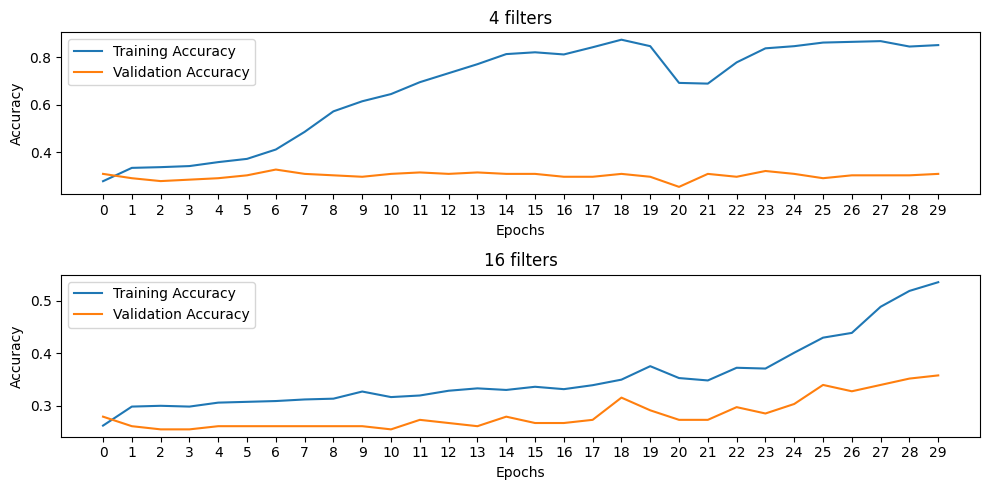

In [6]:
N_EPOCHS = 30
BATCH_SIZE = 32
LEARNING_RATE = 0.01

plt.figure(figsize=(10,5))
for index, n_filters in enumerate([4, 16]):
    model = models.Sequential()
    model.add(
        layers.Conv2D(n_filters, (3,3), activation='relu', input_shape=INPUT_SHAPE)
    )
    model.add(
        layers.MaxPooling2D((2, 2))
    )
    model.add(
        layers.Flatten()
    )
    model.add(
        layers.Dense(16, activation='relu')
    )
    model.add(
        layers.Dense(4, activation='softmax')
    )
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    model.summary()
    # Train model
    history = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset, batch_size=BATCH_SIZE)
    plt.subplot(2, 1, index + 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xticks(np.arange(N_EPOCHS))
    plt.title(f'{n_filters} filters')
plt.tight_layout()
plt.show()

Describe and discuss what you observe by comparing the performance of the first model and the
other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there
model overfit or underfit or just right? (1 point)

The model is performing extermely inconsistenly due to the relatively small size of the dense layer compared to the output of the convolutional layer. Also, we do not have many datapoints per class so validation accuracy will always be poor. The model gets trapped into local minima most of the time, and when it doesn't it simply memorizes the training data hence the low validation score. 

During the experiment I tried raising and decreasing the number of kernels. Decreasing this number to 4 led to a smaller output size therefore leading to better training accuracy. Increasing it to 16 made the output of the convolutional layer bigger which in this case decreased training accuracy. Other runs yielded different results, with either one or both models getting stuck in a local minima or the 16 filter model winning. It all depends on the gradiant descent path and initialization, which is random.

Overall I will say all three models are underfitting due to the dense layer being too small, and the relatively small amount of data.